## 공통 코드

In [1]:
import sys
# sklearn ≥0.20 필수
import sklearn
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "clustering"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## 샘플 데이터를 이용한 군집

In [2]:
# 샘플 데이터 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=42)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [4]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,6.132498,2.352236,1
1,-4.604994,9.671808,0
2,-6.889425,-7.597913,2
3,-8.038095,-8.006081,2
4,-7.351119,-6.200428,2


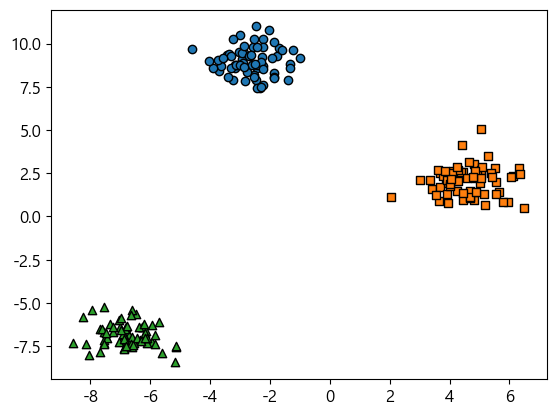

In [6]:
# 데이터 분포 확인
target_list = np.unique(y)

# 각 target별 scatter plot 의 marker 값들.
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 세트을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], 
                edgecolor='k', marker=markers[target])
plt.show()

In [11]:
# 데이터 프레임으로 변환
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,6.132498,2.352236,1
1,-4.604994,9.671808,0
2,-6.889425,-7.597913,2


In [16]:
from sklearn.mixture import GaussianMixture
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
y_pred, y

(array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2,
        1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2,
        1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0,
        2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1,
        2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1,
        0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1,
        2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2,
        0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0,
        2, 2], dtype=int64),
 array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
        2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1,
        2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2,
        0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
        1

In [15]:
# 매핑된 결과 확인
from scipy import stats
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id
mapping

{0: 0, 2: 1, 1: 2}

## 과일 이미지를 이용한 군집

In [17]:
# 데이터 가져오기
fruits = np.load('./data/fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


In [18]:
# 세로 픽셀을 출력
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


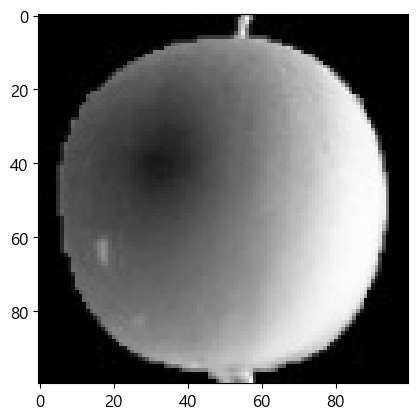

In [41]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

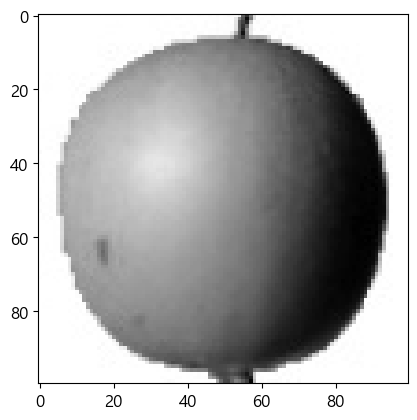

In [46]:
# 이미지 출력 - 반전해서 출력
# 우리가 관심을 갖는 것은 물체이므로 물체 이외의 부분은 흰색으로 보여지는 것이
# 더 나은 경우가 있음
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

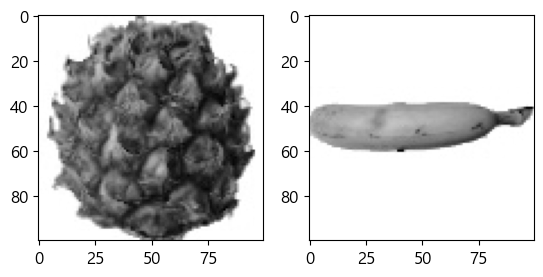

In [21]:
# 파인애플과 바나나 이미지 출력
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [23]:
# 이미지 데이터를 비교하기 위해서 1차원으로 변경
# print(fruits[0].reshape(-1, 100*100))
# print(fruits[0].flatten())

apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print(apple.shape)

(100, 10000)


In [28]:
print(apple.mean(axis=1))
# print(pineapple.mean(axis=1))
# print(banana.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


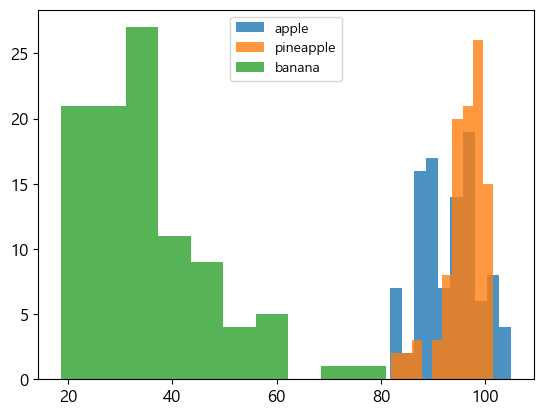

In [32]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

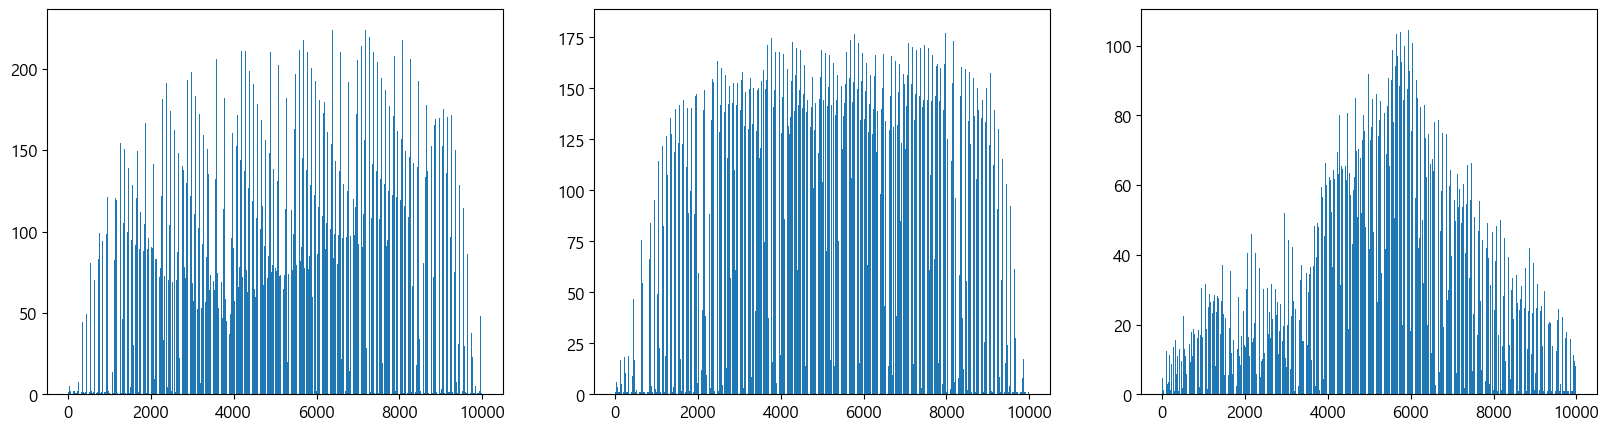

In [43]:
# 픽셀 단위로 평균 분포 확인
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

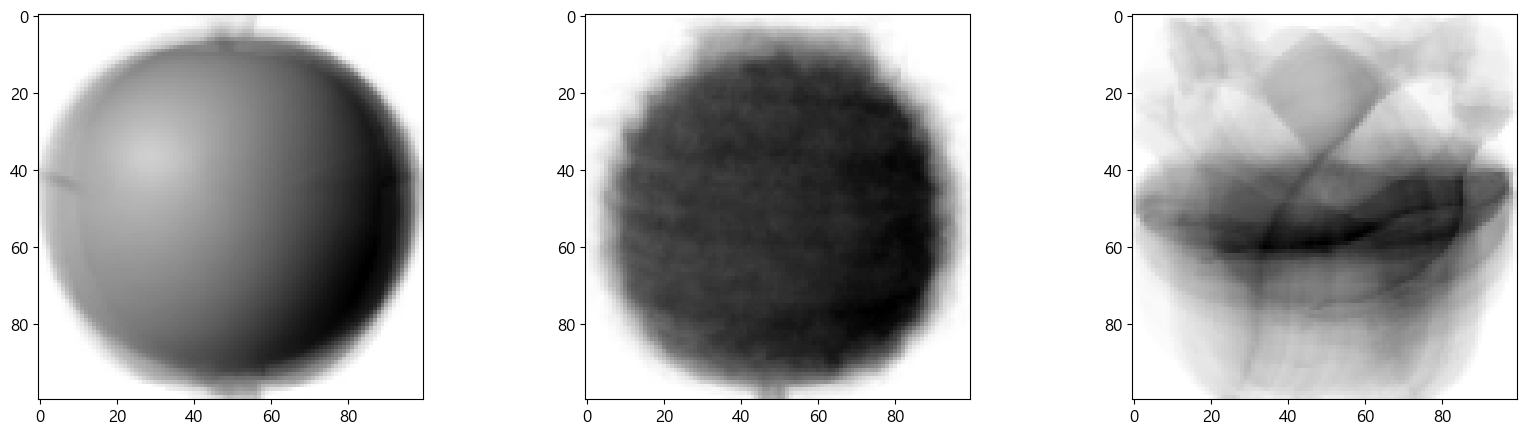

In [47]:
# 평균을 가지고 이미지를 생성
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [48]:
# 모든 데이터에서 사과의 평균을 뺀 값
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


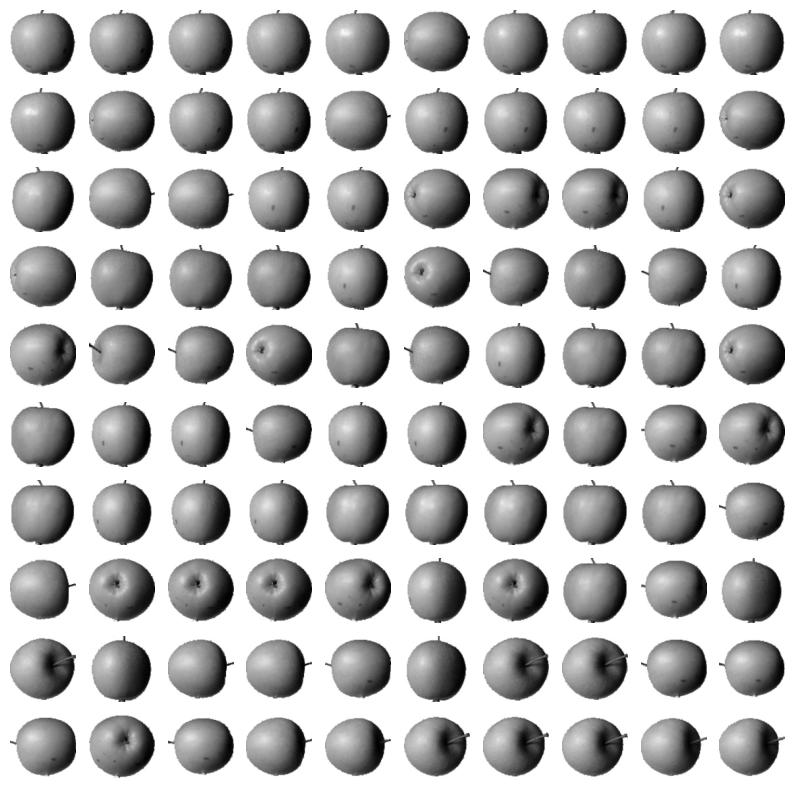

In [49]:
# 평균을 뺀 절대값이 가장 작은 것 100개 출력
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

In [51]:
from sklearn.datasets import make_blobs
blob_centers = np.array([[ 0.2, 2.3], [-1.5 , 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

그림 저장: blobs_plot


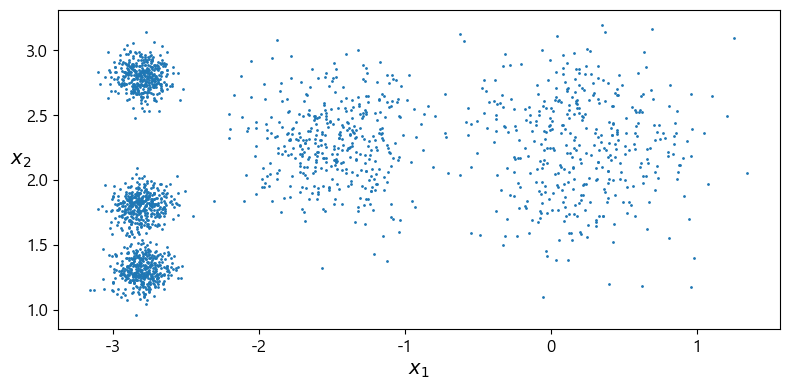

In [52]:
# 데이터 확인
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show() 

In [53]:
# 군집 수행
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
print(y_pred)


[4 0 1 ... 2 1 0]


In [55]:
# 각 그룹의 중앙점의 좌표 출력
print(kmeans.cluster_centers_)

[[-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]
 [-1.46679593  2.28585348]
 [-2.80037642  1.30082566]]


In [57]:
# 예측
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [59]:
# 결정 경계를 시각화 - voronoi diagram
# 평면을 특정 점까지의 거리가 가까운 점의 집합으로 분할한 그림
# 데이터의 분포를 시각화
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# 중심점을 출력하는 함수
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='o', s=35, linewidths=8,
        color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=2, linewidths=12,
        color=cross_color, zorder=11, alpha=1)

# 결정 경계를 그려주는 함수
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),     cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)

    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

그림 저장: voronoi_plot


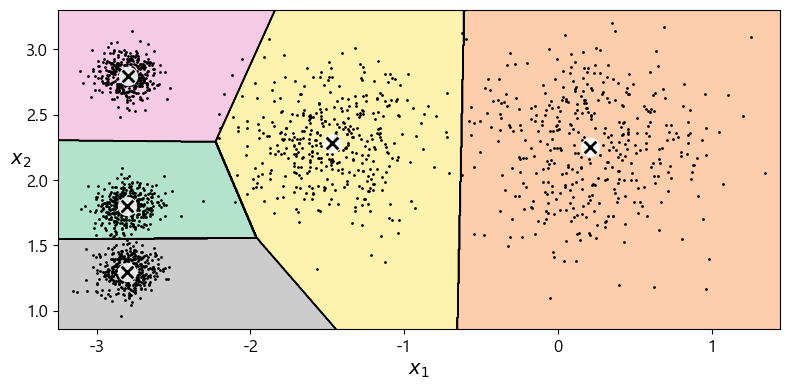

In [60]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

In [62]:
# 중심점과의 거리 확인
kmeans.transform(X_new), kmeans.predict(X_new)

(array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
        [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
        [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
        [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]]),
 array([1, 1, 2, 2]))

In [63]:
# 유클리드 거리 확인
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [64]:
# 평가 지표 출력
print(kmeans.inertia_)
print(kmeans.score(X))

211.59853725816836
-211.59853725816836


In [66]:
%%time
from sklearn.cluster import MiniBatchKMeans
k = 5
minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

CPU times: total: 1.22 s
Wall time: 207 ms


211.652398504332

In [67]:
# 이너셔를 이용한 최적의 클러스터 개수 찾기
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[3534.8360871670793, 1149.6140723750277, 653.2167190021554, 261.796777856947, 211.59853725816836, 169.23715382893545, 141.38336489568496, 119.11983416102879, 102.5967871847639]


그림 저장: inertia_vs_k_plot


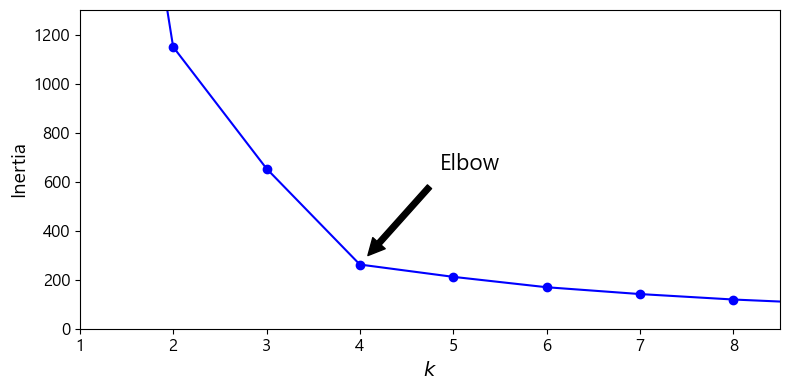

In [69]:
# elbow 를 찾기 위해서 시각화
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
            xy=(4, inertias[3]),
            xytext=(0.55, 0.55),
            textcoords='figure fraction',
            fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

In [70]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

그림 저장: silhouette_score_vs_k_plot


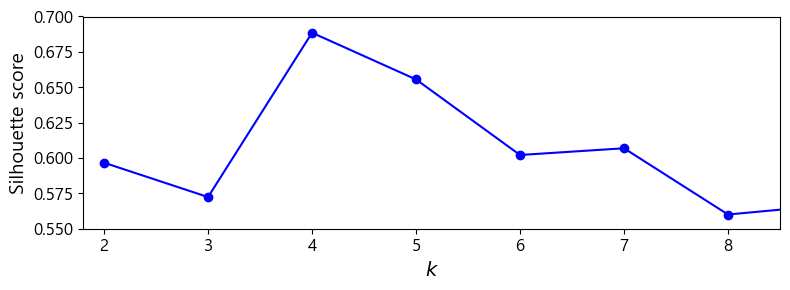

In [71]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

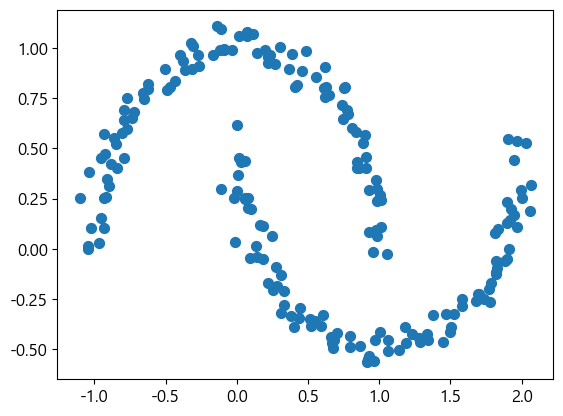

In [72]:
## K-means 의 한계

# 완전한 원형이 아닌 데이터 생성
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')

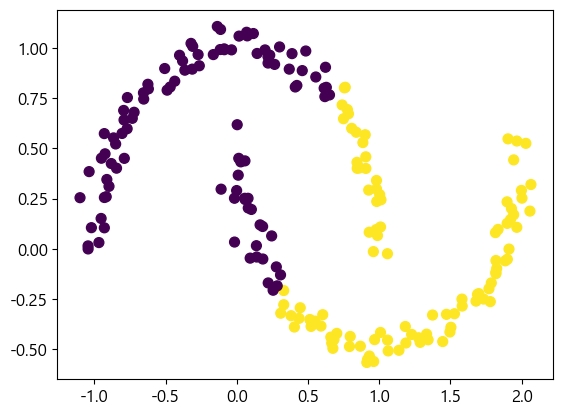

In [74]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

(533, 800, 3)


(-0.5, 799.5, 532.5, -0.5)

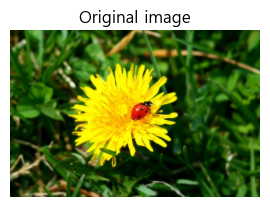

In [76]:
# 군집을 이용한 이미지 분할
# 이미지를 읽어와서 출력하기
from matplotlib.image import imread
image = imread('./data/ladybug.png')
print(image.shape)

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

In [77]:
# 색상을 가지고 군집을 수행
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [ ]:
#색상을 가지고 군집을 수행
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
#각 픽셀이 속한 클러스터의 중앙 좌표를 저장
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
#print(segmented_img)

In [ ]:
segmented_imgs = []
n_colors = [10, 8, 6, 4, 2]
for n_clusters in n_colors:
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{0} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [ ]:
#군집을 이용한 차원 축소 후 분류

#8 * 8 크기의 흑백 숫자 이미지 1797 개 가져오기
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

print(X_digits.shape)
print(y_digits.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits,
                                                   random_state=42)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', 
                             max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

log_reg_score = log_reg.score(X_test, y_test)
print(log_reg_score)

In [ ]:
from sklearn.pipeline import Pipeline
#군집한 클러스터를 속성으로 추가해서 분류를 하기 때문에 성능이 좋아질 가능성이 높음
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs",
                                  max_iter=5000, random_state=42))
])
pipeline.fit(X_train, y_train)

pipeline_score = pipeline.score(X_test, y_test)
print(pipeline_score)

In [ ]:
%%time
#최적의 클러스터 개수 찾기
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

### 계층적 클러스터링

In [ ]:
#병합 군집
np.random.seed(42)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID4']

X = np.random.random_sample([5, 3]) * 10 
df = pd.DataFrame(X, columns=variables, index=labels)
print(df)

#거리 계산
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels,
                       index=labels)
print(row_dist)

#계층적 클러스터링
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete')
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 
                                   'items in cluster'],
            index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

In [ ]:
#첫번째 와 두번째는 병합된 클러스터 이름이고 세번째는 거리고 네번째는 아이템 개수
#처음에는 클러스터가 데이터 개수만큼이므로 5개
#1번 클러스터 와 4번 클러스터를 합쳐서 5번 클러스터 생성(데이터 2개)
#0번 클러스터 와 2번 클러스터를 합쳐서 6번 클러스터 생성(데이터 2개)
#3번 클러스터 와 5번 클러스터를 합쳐서 7번 클러스터 생성(데이터 3개)
#6번 클러스터 와 7번 클러스터를 합쳐서 8번 클러스터 생성(데이터 5개)

#덴드로그램 출력
#계층적 군집을 시각화 하는 도구
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels=labels)
plt.show()

### GMM(가우시안 혼합 모델)

In [ ]:
#샘플 데이터를 3개의 군집으로 묶기
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)

#중심점의 좌표
print(gm.means_)

#예측
print(gm.predict(X))

#확률
print(gm.predict_proba(X))

#생성
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)